In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/
import scipy as sp # for signal processing
from scipy import signal
import random
import makelab
from makelab import signal
from makelab import audio

## Different Quantisation Levels


Sampling rate: 44100 Hz
Number of channels = 1
Total samples: 321536
[0 0 0 ... 0 0 0]
8-bit audio ranges from -128 to 127
Max value: 17 Avg value: -0.00


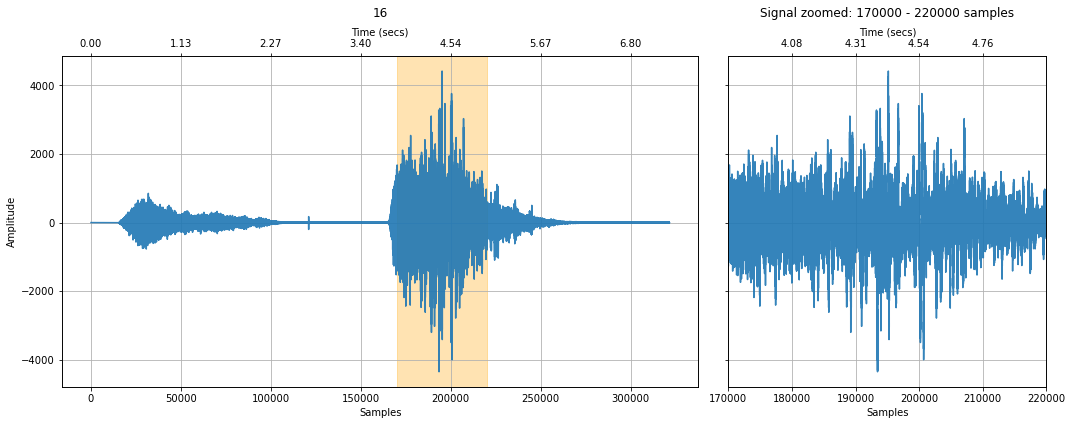

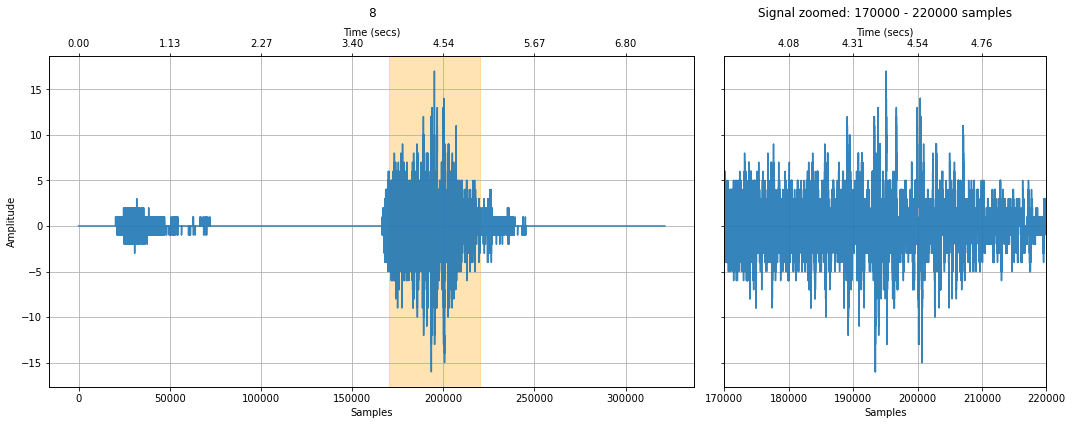

In [6]:
# Change this wave file to any 16-bit audio sample

your_sound_file = 'data/audio/FVC-1.wav'
your_sampling_rate, your_audio_data_16_bit = sp.io.wavfile.read(your_sound_file)

print(f"Sampling rate: {your_sampling_rate} Hz")
print(f"Number of channels = {len(your_audio_data_16_bit.shape)}")
print(f"Total samples: {your_audio_data_16_bit.shape[0]}")

if len(your_audio_data_16_bit.shape) == 2:
    # convert to mono
    print("Converting stereo audio file to mono")
    your_audio_data_16_bit = your_audio_data_16_bit.sum(axis=1) / 2

# Convert to float
your_audio_data_float = your_audio_data_16_bit / 2**16 # 16 bit audio

# Try different quantization levels here
quantization_bits = 8 # change this and see what happens!
your_audio_data_quantized = your_audio_data_float * 2**quantization_bits
your_audio_data_quantized = your_audio_data_quantized.astype(int)
print(your_audio_data_quantized)
print(f"{quantization_bits}-bit audio ranges from -{2**(quantization_bits - 1)} to {2**(quantization_bits - 1) - 1}")
print(f"Max value: {np.max(your_audio_data_quantized)} Avg value: {np.mean(your_audio_data_quantized):.2f}")

xlim_zoom = (170000, 220000) # make sure to change the zoom range too
makelab.signal.plot_signal(your_audio_data_16_bit, your_sampling_rate, 16, xlim_zoom = xlim_zoom)
makelab.signal.plot_signal(your_audio_data_quantized, your_sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
ipd.Audio(your_audio_data_quantized, rate=sampling_rate)

##  how do sampling rates affect sound quality?



Sampling rate: 44100 Hz
Number of channels = 1
Total samples: 329728


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
D:\GitHub\UbiquitousComputing\signals-master\Tutorials\makelab\signal.py:427: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax_xtick_labels_strs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


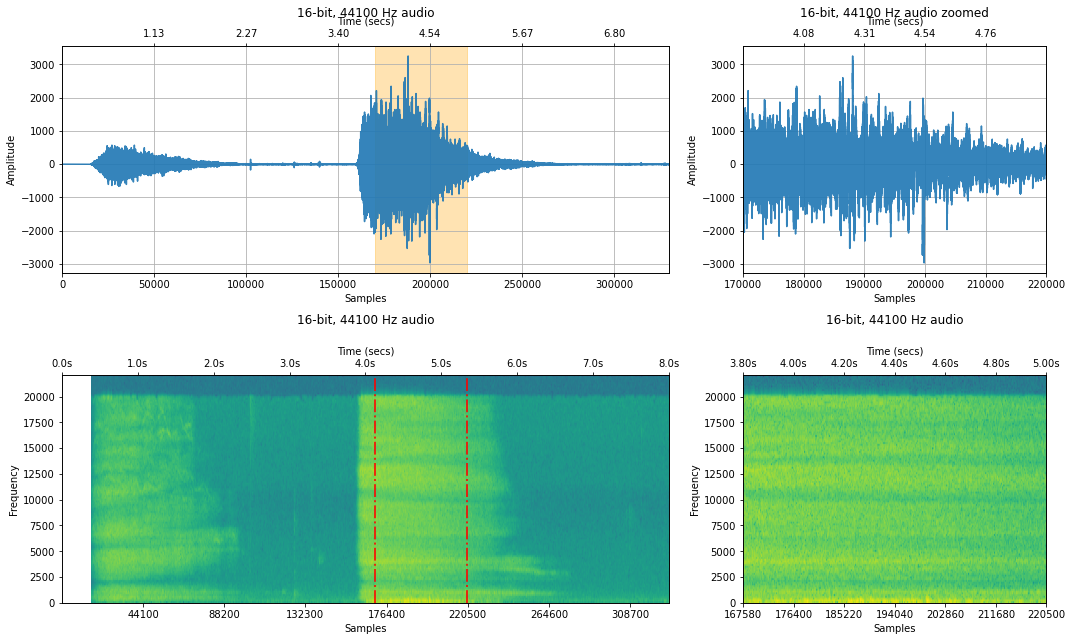

In [20]:
# feel free to change this to some other 44.1kHz sound file
sound_file = 'data/audio/FVC-3.wav' 
sampling_rate, audio_data_44100 = sp.io.wavfile.read(sound_file)

print(f"Sampling rate: {sampling_rate} Hz")
print(f"Number of channels = {len(audio_data_44100.shape)}")
print(f"Total samples: {audio_data_44100.shape[0]}")

if len(audio_data_44100.shape) == 2:
    # convert to mono
    print("Converting stereo audio file to mono")
    audio_data_44100 = audio_data_44100.sum(axis=1) / 2
    
quantization_bits = 16
xlim_zoom = (170000, 220000)

makelab.signal.plot_signal_and_spectrogram(audio_data_44100, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
ipd.Audio(audio_data_44100, rate=sampling_rate)


### 22500 Hz sampling rate

New sampling rate: 22050 Hz
resample_xlim_zoom (85000.0, 110000.0)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
D:\GitHub\UbiquitousComputing\signals-master\Tutorials\makelab\signal.py:427: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax_xtick_labels_strs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


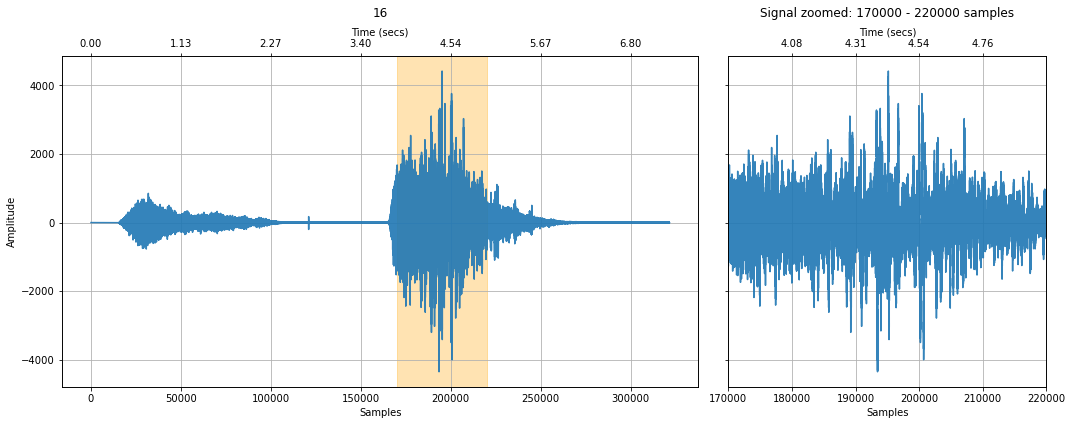

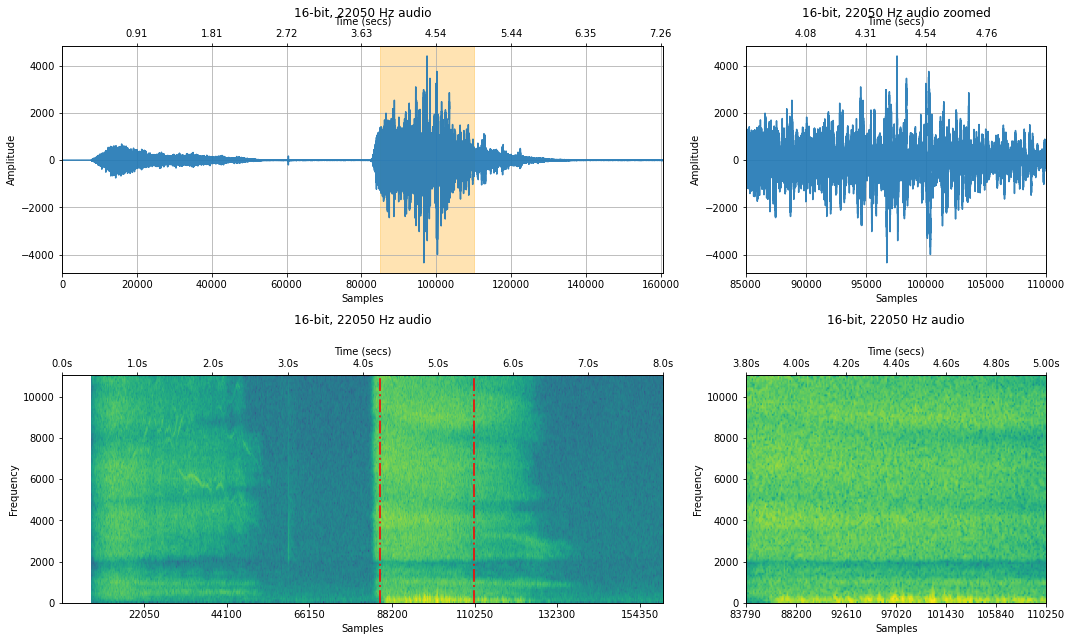

In [10]:
resample_factor = 2
new_sampling_rate = int(sampling_rate / resample_factor)
audio_data_22500 = audio_data_44100[::resample_factor]
print(f"New sampling rate: {new_sampling_rate} Hz")
resample_xlim_zoom = (xlim_zoom[0] / resample_factor, xlim_zoom[1] / resample_factor)
print("resample_xlim_zoom", resample_xlim_zoom)
#plot_audio(audio_data_22500, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
ipd.Audio(audio_data_22500, rate=new_sampling_rate)

# plot_spectrogram(audio_data_22500, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
makelab.signal.plot_signal(audio_data_44100, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
makelab.signal.plot_signal_and_spectrogram(audio_data_22500, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
ipd.Audio(audio_data_22500, rate=new_sampling_rate)

### 11,025 Hz sampling rate

Sampling rate: 44100 Hz with Nyquist limit 22050 Hz
New sampling rate: 11025 Hz with Nyquist limit 5512 Hz


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
D:\GitHub\UbiquitousComputing\signals-master\Tutorials\makelab\signal.py:427: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax_xtick_labels_strs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


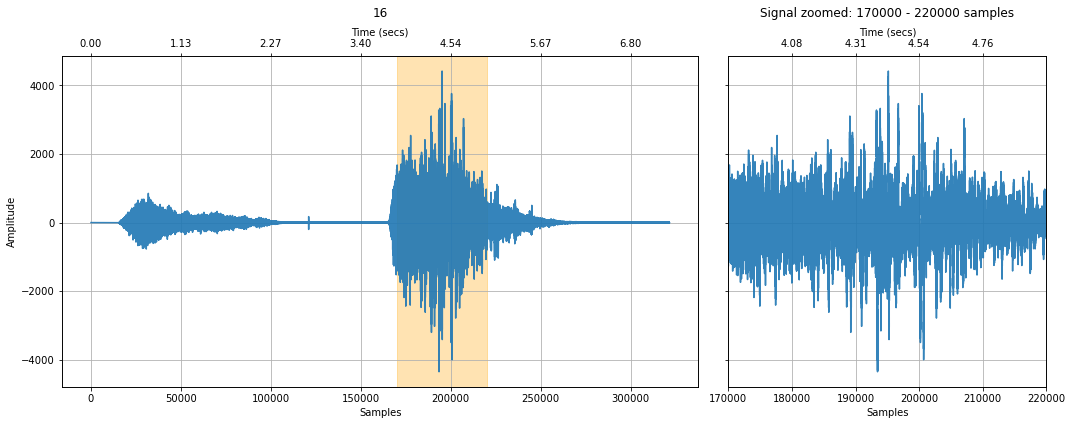

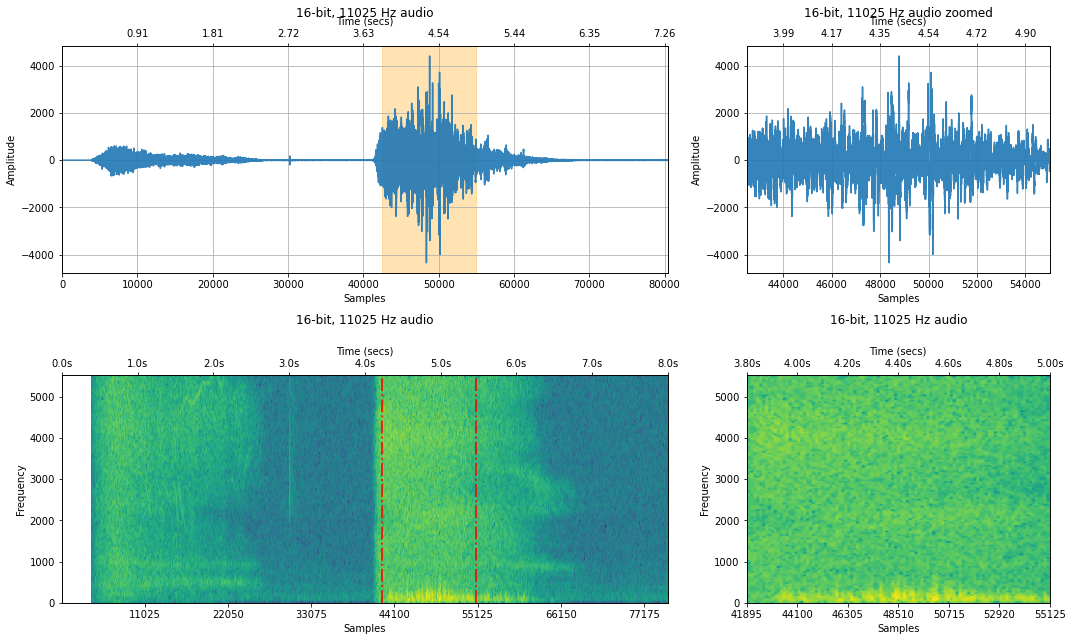

In [11]:
resample_factor = 4
new_sampling_rate = int(sampling_rate / resample_factor)
audio_data_11025 = audio_data_44100[::resample_factor]
resample_xlim_zoom = (xlim_zoom[0] / resample_factor, xlim_zoom[1] / resample_factor)
# plot_waveform(audio_data_11025, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
print(f"Sampling rate: {sampling_rate} Hz with Nyquist limit {int(sampling_rate / 2)} Hz")
print(f"New sampling rate: {new_sampling_rate} Hz with Nyquist limit {int(new_sampling_rate / 2)} Hz")

makelab.signal.plot_signal(audio_data_44100, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
makelab.signal.plot_signal_and_spectrogram(audio_data_11025, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
ipd.Audio(audio_data_11025, rate=new_sampling_rate)



### 4,410 Hz sampling rate

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
D:\GitHub\UbiquitousComputing\signals-master\Tutorials\makelab\signal.py:427: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax_xtick_labels_strs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


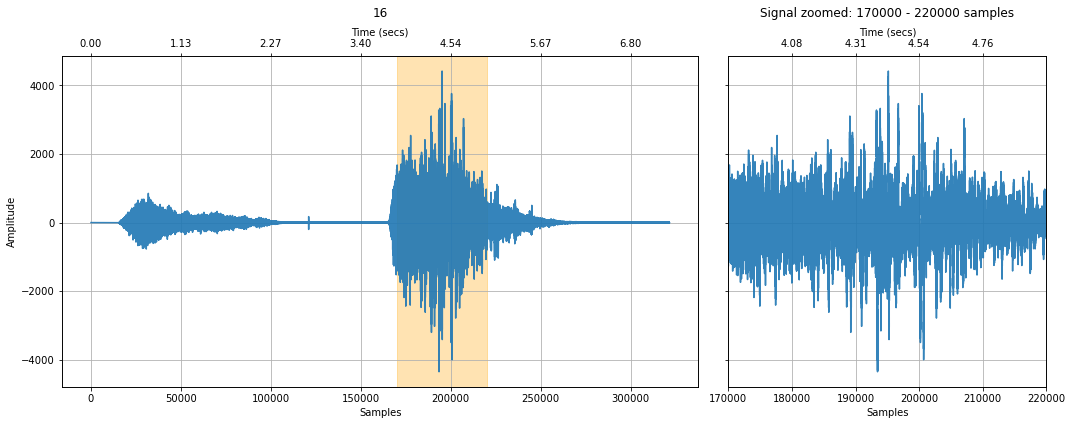

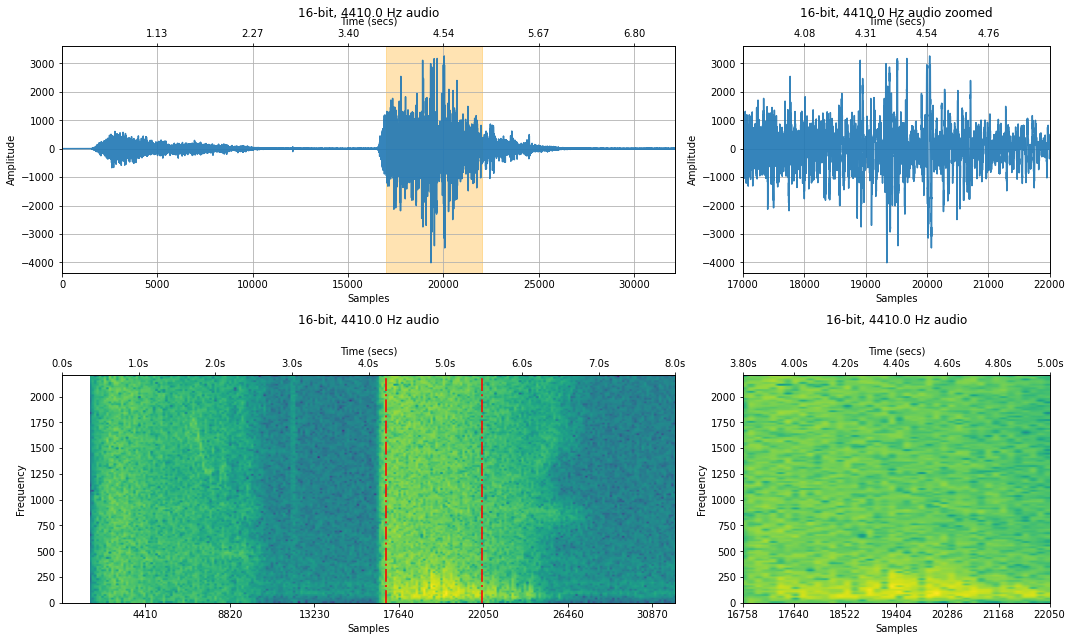

In [12]:
resample_factor = 10
new_sampling_rate = sampling_rate / resample_factor
audio_data_4410 = audio_data_44100[::resample_factor]
resample_xlim_zoom = (xlim_zoom[0] / resample_factor, xlim_zoom[1] / resample_factor)
makelab.signal.plot_signal(audio_data_44100, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
#plot_waveform(audio_data_4410, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
makelab.signal.plot_signal_and_spectrogram(audio_data_4410, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
ipd.Audio(audio_data_4410, rate=new_sampling_rate)

### 2,205 Hz sampling rate
At sampling rates less than 3,000 Hz, the audio signal would no longer play in Chrome (but it did work in Firefox)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
D:\GitHub\UbiquitousComputing\signals-master\Tutorials\makelab\signal.py:427: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax_xtick_labels_strs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


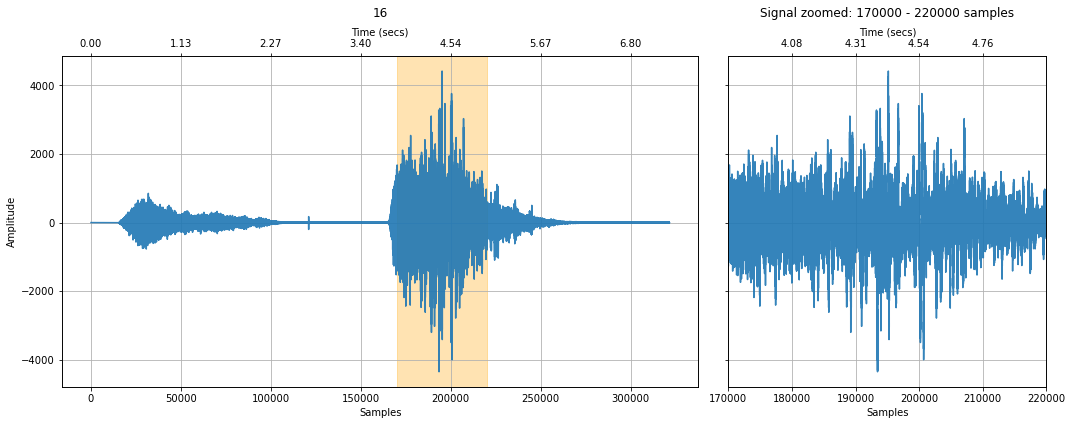

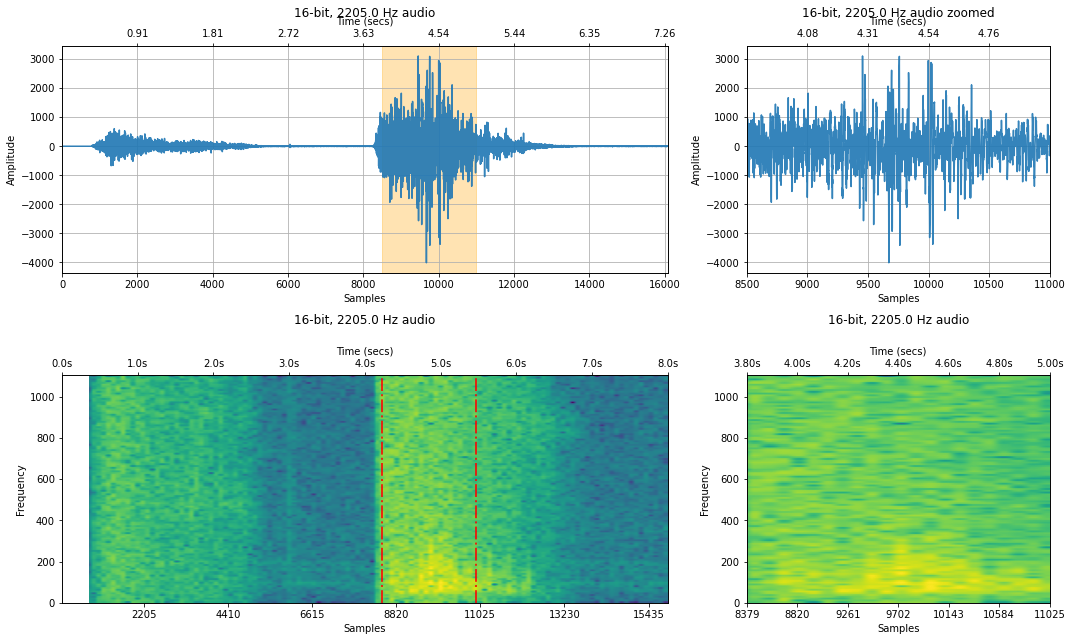

In [13]:
resample_factor = 20
new_sampling_rate = sampling_rate / resample_factor
audio_data_2205 = audio_data_44100[::resample_factor]
resample_xlim_zoom = (xlim_zoom[0] / resample_factor, xlim_zoom[1] / resample_factor)

makelab.signal.plot_signal(audio_data_44100, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
#plot_waveform(audio_data_4410, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
makelab.signal.plot_signal_and_spectrogram(audio_data_2205, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
ipd.Audio(audio_data_2205, rate=new_sampling_rate)

### 1,407 Hz sampling rate

Wont play in Chrome

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
D:\GitHub\UbiquitousComputing\signals-master\Tutorials\makelab\signal.py:427: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax_xtick_labels_strs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


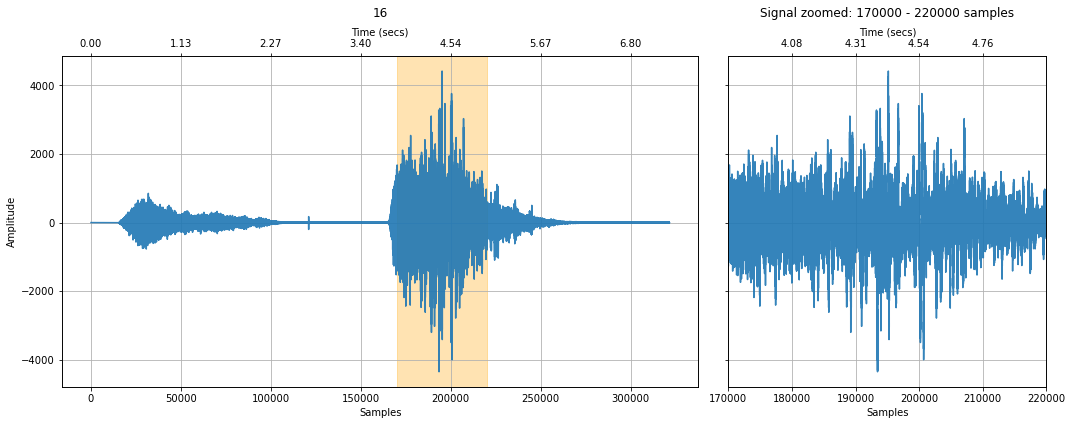

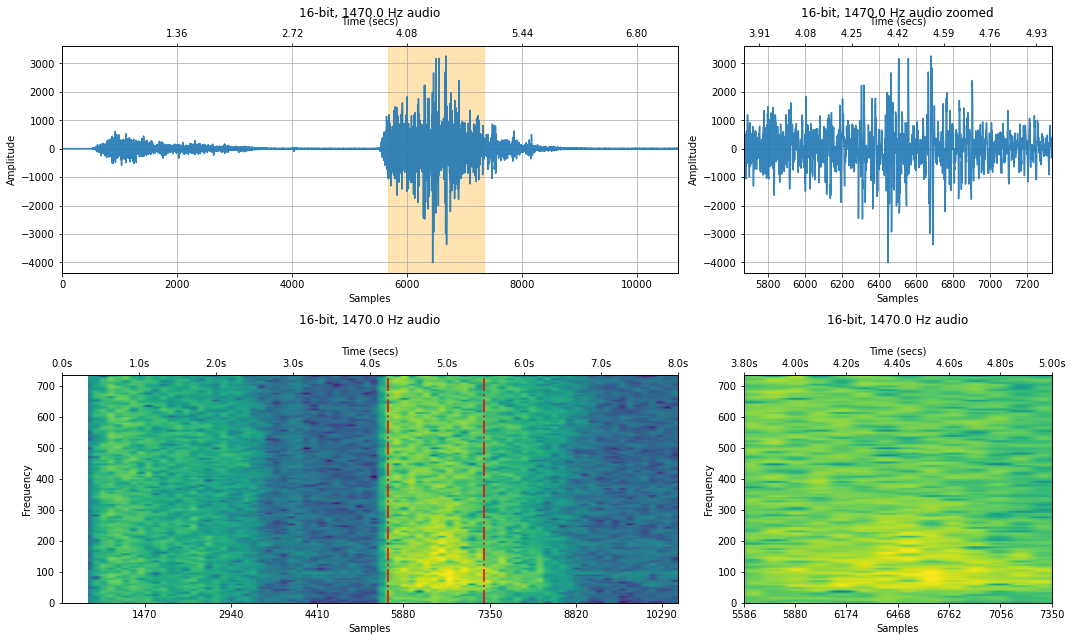

In [15]:
resample_factor = 30
new_sampling_rate = sampling_rate / resample_factor
audio_data_1407 = audio_data_44100[::resample_factor]
resample_xlim_zoom = (xlim_zoom[0] / resample_factor, xlim_zoom[1] / resample_factor)
makelab.signal.plot_signal(audio_data_44100, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
#plot_waveform(audio_data_1407, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
makelab.signal.plot_signal_and_spectrogram(audio_data_1407, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
ipd.Audio(audio_data_1407, rate=new_sampling_rate)

### 882 Hz sampling rate

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
D:\GitHub\UbiquitousComputing\signals-master\Tutorials\makelab\signal.py:427: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax_xtick_labels_strs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7531: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


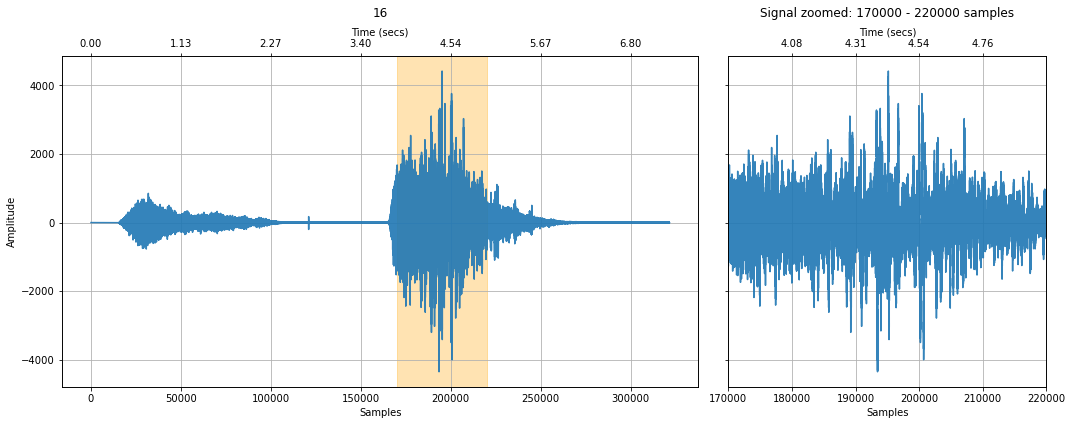

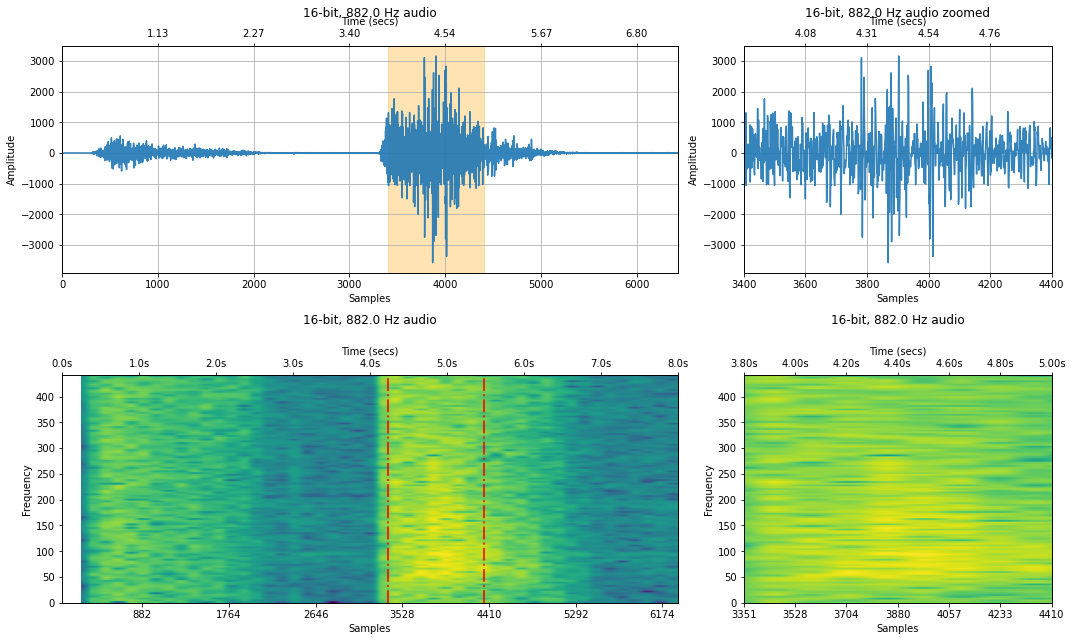

In [16]:
resample_factor = 50
new_sampling_rate = sampling_rate / resample_factor
audio_data_882 = audio_data_44100[::resample_factor]
resample_xlim_zoom = (xlim_zoom[0] / resample_factor, xlim_zoom[1] / resample_factor)

makelab.signal.plot_signal(audio_data_44100, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
#plot_waveform(audio_data_882, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
makelab.signal.plot_signal_and_spectrogram(audio_data_882, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
ipd.Audio(audio_data_882, rate=new_sampling_rate)

### 441 Hz sampling rate

D:\GitHub\UbiquitousComputing\signals-master\Tutorials\makelab\signal.py:427: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax_xtick_labels_strs)


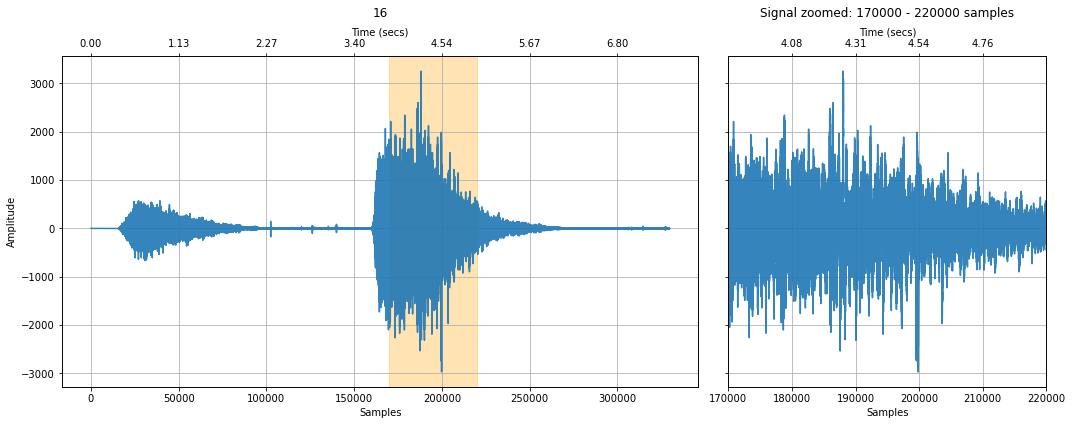

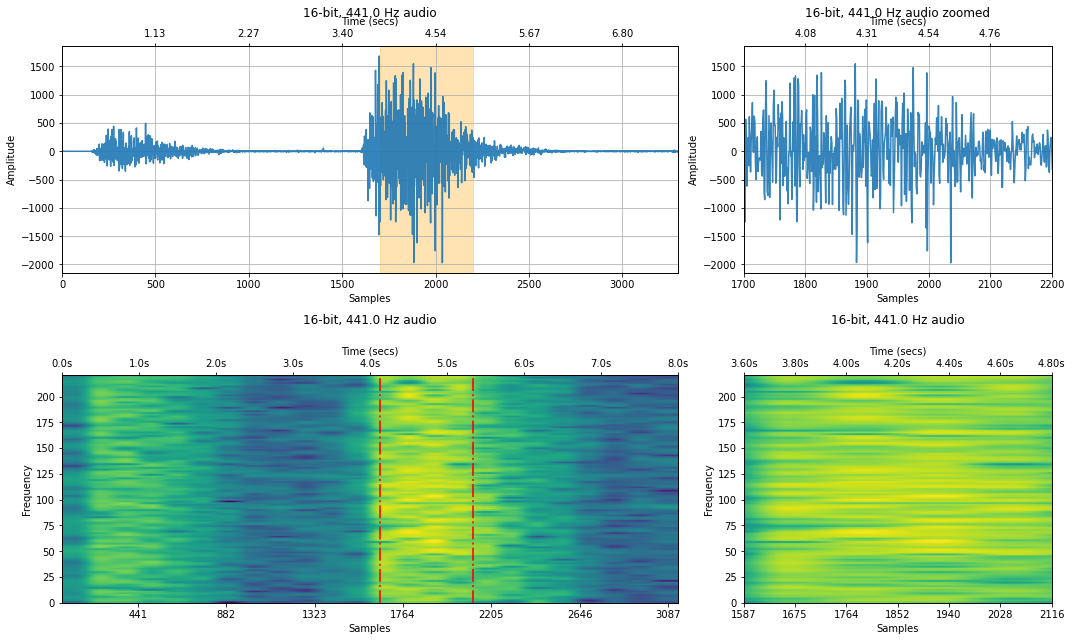

In [21]:
resample_factor = 100
new_sampling_rate = sampling_rate / resample_factor
audio_data_441 = audio_data_44100[::resample_factor]
resample_xlim_zoom = (xlim_zoom[0] / resample_factor, xlim_zoom[1] / resample_factor)
makelab.signal.plot_signal(audio_data_44100, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
#plot_waveform(audio_data_441, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
makelab.signal.plot_signal_and_spectrogram(audio_data_441, new_sampling_rate, quantization_bits, xlim_zoom = resample_xlim_zoom)
ipd.Audio(audio_data_441, rate=new_sampling_rate)